This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

To provide sufficient context for introducing tensors and gradient descent, we’ll begin the
chapter with a practical example of a neural network. Then we’ll go over every new concept
that’s been introduced, point by point.

## A first look at a neural network

The problem we’re trying to solve here is to classify grayscale images of handwritten digits ($28 \times
28$ pixels) into their $10$ categories ($0$ through $9$). We’ll use the MNIST dataset, a classic in the
machine-learning community, which has been around almost as long as the field itself and has
been intensively studied. It’s a set of $60,000$ training images, plus $10,000$ test images, assembled
by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You
can think of "solving" MNIST as the "Hello World" of deep learning—it’s what you do to verify
that your algorithms are working as expected.

**Loading the MNIST dataset in Keras**

The MNIST dataset comes preloaded in Keras, in the form of a set of four NumPy arra

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

The workflow will be as follows: First, we’ll feed the neural network the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the **layer**. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

Here, our model consists of a sequence of two `Dense` layers, which are densely connected (also
called **fully connected**) neural layers. The second (and last) layer is a $10$-way **softmax
classification** layer, which means it will return an array of $10$ probability scores (summing to $1$).
Each score will be the probability that the current digit image belongs to one of our $10$ digit classes.

**The compilation step**

To make the model ready for training, we need to pick three more things, as part of the **compilation** step:

- An **optimizer**—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
- A **loss function**—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction. 
- **Metrics** to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [11]:
import numpy as np

# what does our data look like?
train_images[0].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

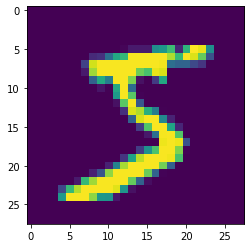

In [12]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0]/255)

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the interval $[0, 1]$. Previously, our training images were stored in an array of shape $(60000, 28, 28)$ of type `uint8` with values in the $[0, 255]$ interval. We transform it into a `float32` array of shape $(60000, 28 * 28)$ with values between $0$ and $1$.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

We’re now ready to train the model, which in Keras is done via a call to the model’s `fit()` method—we fit the model to its training data:

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2583 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1041 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0681 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0507 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0369 - accuracy: 0.9893


Two quantities are displayed during training: the **loss** of the model over the training data, and the **accuracy** of the model over the training data. We quickly reach an accuracy of $0.989$ ($98.9\%$) on the training data.

**Using the model to make predictions**

Now that we have a trained model, you can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([9.9006592e-10, 9.8942868e-12, 2.6512639e-06, 1.2493342e-05,
       1.9026781e-12, 7.5795281e-09, 2.0662220e-14, 9.9998474e-01,
       1.5339120e-09, 8.2385590e-08], dtype=float32)

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.99998474

In [18]:
test_labels[0]

7

**Evaluating the model on new data**

On average, how good is our model at classifying such never-seen-before digits? Let’s check by computing average accuracy over the entire test set.

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 761us/step - loss: 0.0623 - accuracy: 0.9811
test_acc: 0.9811000227928162


This concludes our first example—you just saw how you can build and train a neural network to classify handwritten digits in less than 15 lines of Python code. In this chapter and the next, we’ll go into detail about every moving piece we just previewed and clarify what’s going on behind the scenes. You’ll learn about tensors, the data-storing objects going into the model; tensor operations, which layers are made of; and gradient descent, which allows your model to learn from its training examples.

## Data representations for neural networks

### Scalars (rank-0 tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0 tensor, or 0D tensor). In NumPy, a `float32` or `float64` number is a scalar tensor (or scalar array). You can display the number of axes of a NumPy tensor via the `ndim` attribute; a scalar tensor has 0 axes (`ndim == 0`). The number of axes of a tensor is also called its rank.

In [39]:
import numpy as np
x = np.array(12)
x

array(12)

In [40]:
x.ndim, x.shape

(0, ())

### Vectors (rank-1 tensors)

An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis. Following is a NumPy vector

In [41]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [42]:
x.ndim, x.shape

(1, (5,))

### Matrices (rank-2 tensors)

An array of vectors is a , or rank-2 tensor, or 2D tensor. A matrix matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers. This is a NumPy matrix:

In [45]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
])

x.ndim, x.shape

(2, (3, 5))

In [46]:
# access rows
x[1]

array([ 6, 79,  3, 35,  1])

In [48]:
# access columns
x[:,1]

array([78, 79, 80])

### Rank-3 tensors and higher-rank tensors

If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers. Following is a NumPy rank-3 tensor:

In [52]:
x = np.array([
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ]
])

x.ndim, x.shape

(3, (3, 3, 5))

By packing rank-3 tensors in an array, you can create a rank-4 tensor, and so on. In deep learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if you process video data.

### Key attributes

A tensor is defined by three key attributes:

- Number of axes (**rank**)—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s `ndim` in Python libraries such as NumPy or TensorFlow.
- **Shape**—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape $(3, 5)$, and the rank-3 tensor example has shape $(3, 3, 5)$. A vector has a shape with a single element, such as $(5,)$, whereas a scalar has an empty shape, $()$.
- **Data type** (usually called `dtype` in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be `float16`, `float32`, `float64`, `uint8`, and so on. In TensorFlow, you are also likely to come across `string` tensors.

In [53]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [54]:
train_images.ndim

3

In [55]:
train_images.shape

(60000, 28, 28)

In [56]:
train_images.dtype

dtype('uint8')

So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of $60,000$ matrices of $28 \times 28$ integers. Each such matrix is a grayscale image, with coefficients between $0$ and $255$.

**Displaying the fourth digit**

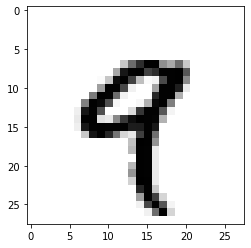

In [57]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [58]:
train_labels[4]

9

### Manipulating tensors in NumPy

In the previous example, we selected a specific digit alongside the first axis using the syntax `train_images[i]`. Selecting specific elements in a tensor is called tensor **slicing**. Let’s look at the tensor-slicing operations you can do on NumPy arrays

In [59]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [60]:
# this is identical but more verbose and explicit, telling that you want all data from the second and third axes (short :)
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [61]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [62]:
# For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this
my_slice = train_images[:, 14:, 14:]

It’s also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of $14 \times 14$ pixels centered in the middle, you do this

In [0]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the **samples axis** (sometimes called the samples dimension). In the MNIST example, "samples" are images of digits.

In [63]:
batch = train_images[:128]  # first batch

In [64]:
batch = train_images[128:256]  # second batch

In [65]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]  # nth batch

When considering such a batch tensor, the first axis (axis 0) is called the **batch axis** or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

### Real-world examples of data tensors

Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:

- **Vector data**—rank-$2$ tensors of shape `(samples, features)`, where each sample is a vector of numerical attributes ("features").
- **Timeseries data or sequence data** — rank-$3$ tensors of shape `(samples, timesteps, features)`, where each sample is a sequence (of length `timesteps`) of feature vectors.
- **Images**—rank-$4$ tensors of shape `(samples, height, width, channels)`, where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values ("channels").
- **Video**—rank-$5$ tensors of shape `(samples, frames, height, width, channels)`, where each sample is a sequence (of length frames) of images.

### Vector data

![](https://am3pap005files.storage.live.com/y4mDDtHHiJKppMkqD9ryFP0adqiSksMluXfKctc64Fi9in08eFk6G6Zw9jI2TNdHOQ4YmnX6KjEt2BNujXC9dSNk3UeQXpPm_S3B371D2290nFZSbgAdBHCZ-3O4uAqxg64DaKY0sselTbuZqK0GwaJnpK3WHM9kQbpp4AM1Z-uOo1DfVkAnNr_JC-TxzVNEFiw?width=262&height=282&cropmode=none)

Let’s take a look at two examples:

- An actuarial dataset of people, where we consider each person’s `age`, `gender`, and `income`. Each person can be characterized as a vector of $3$ values, and thus an entire dataset of $100,000$ people can be stored in a rank-$2$ tensor of shape $(100000, 3)$. 
- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of $20,000$ common words). Each document can be encoded as a vector of $20,000$ values (one count per word in the dictionary), and thus an entire dataset of $500$ documents can be stored in a tensor of shape $(500, 20000)$.

In [2]:
import pandas as pd
import numpy as np

N = 100_000
people = pd.DataFrame({"age": np.random.randint(0, 100, N), "gender": np.random.randint(0, 2, N), "income": np.random.uniform(1000, 1_000_000, N)})

In [78]:
people.head()

,age,gender,income
0,67,0,780957.163789
1,33,1,849225.439104
2,51,1,936802.077564
3,35,0,158944.318228
4,37,0,697514.576966


In [84]:
people.values[0]

array([6.70000000e+01, 0.00000000e+00, 7.80957164e+05])

In [80]:
people.values

array([[6.70000000e+01, 0.00000000e+00, 7.80957164e+05],
       [3.30000000e+01, 1.00000000e+00, 8.49225439e+05],
       [5.10000000e+01, 1.00000000e+00, 9.36802078e+05],
       ...,
       [3.90000000e+01, 1.00000000e+00, 5.44538091e+05],
       [8.00000000e+00, 1.00000000e+00, 4.18023229e+05],
       [4.50000000e+01, 0.00000000e+00, 2.75138003e+05]])

### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a rank-$3$ tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a rank-$2$ tensor), and thus a batch of data will be encoded as a rank-$3$ tensor.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-timeseries_data.png)

The time axis is always the second axis (axis of index 1), by convention. Let’s look at a few examples:

- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a $3$D vector, an entire day of trading is encoded as a matrix of shape $(390, 3)$ (there are $390$ minutes in a trading day), and $250$ days' worth of data can be stored in a rank-$3$ tensor of shape $(250, 390, 3)$. Here, each sample would be one day’s worth of data
- A dataset of tweets, where we encode each tweet as a sequence of $280$ characters out of an alphabet of $128$ unique characters. In this setting, each character can be encoded as a binary vector of size $128$ (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-$2$ tensor of shape $(280, 128)$, and a dataset of $1$ million tweets can be stored in a tensor of shape $(1000000, 280, 128)$.

### Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-$2$ tensors, by convention image tensors are always rank-$3$, with a one-dimensional color channel for grayscale images. A batch of $128$ grayscale images of size $256 \times 256$ could thus be stored in a tensor of shape $(128, 256, 256, 1)$, and a batch of $128$ color images could be stored in a tensor of shape $(128, 256, 256, 3)$

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-image_data.png)

There are two conventions for shapes of images tensors: the **channels-last** convention (which is standard in TensorFlow) and the **channels-first** convention (which is increasingly falling out of favor).

The channels-last convention places the color-depth axis at the end: `(samples, height, width, color_depth)`. Meanwhile, the channels-first convention places the color depth axis right after the batch axis: `(samples, color_depth, height, width)`. With the channels-first convention, the previous examples would become $(128, 1, 256, 256)$ and $(128, 3, 256, 256)$. The Keras API provides support for both formats.

### Video data

Video data is one of the few types of real-world data for which you’ll need rank-$5$ tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-$3$ tensor `(height, width, color_depth)`, a sequence of frames can be stored in a rank-$4$ tensor `(frames, height, width, color_depth)`, and thus a batch of different videos can be stored in a rank-$5$ tensor of shape `(samples, frames, height, width, color_depth)`.

For instance, a $60$-second, $144 \times 256$ YouTube video clip sampled at $4$ frames per second would have $240$ frames. A batch of $4$ such video clips would be stored in a tensor of shape $(4, 240, 144, 256, 3)$. That’s a total of $106,168,320$ values! If the dtype of the tensor was `float32`, then each value would be stored in $32$ bits, so the tensor would represent $405$ MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in `float32`, and
they’re typically compressed by a large factor (such as in the MPEG format).

## The gears of neural networks: tensor operations

In [ ]:
# what happens here?
keras.layers.Dense(512, activation="relu")

### Element-wise operations

In [89]:
# relu(x) is max(x, 0), relu stands for "REctified Linear Unit"
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [90]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In practice, when dealing with NumPy arrays, these operations are available as well-optimized built-in NumPy functions, which themselves delegate the heavy lifting to a Basic Linear Algebra Subprograms (BLAS) implementation. BLAS are low-level, highly parallel, efficient tensor-manipulation routines that are typically implemented in Fortran or C.

In [87]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [91]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.02 s


Likewise, when running TensorFlow code on a GPU, elementwise operations are executed via fully-vectorized CUDA implementations that can best utilize the highly-parallel GPU chip architecture.

### Broadcasting

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape `(a, b, … n, n + 1, … m)` and the other has shape `(n, n + 1, … m)`. The broadcasting will then automatically happen for axes `a` through `n - 1`.

In [0]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [0]:
y = np.expand_dims(y, axis=0)

In [0]:
Y = np.concatenate([y] * 32, axis=0)

In [0]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [92]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [93]:
z.shape

(64, 3, 32, 10)

### Tensor product

The tensor product, or **dot product** (not to be confused with an element-wise product, the `*` operator) is one of the most common, most useful tensor operations.

In mathematical notation, you’d note the operation with a dot ($\cdot{}$).

In [12]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

z

9.274565700200837

In [14]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

naive_vector_dot(np.array([1, 2, 3]), np.array([4, 5, 6]))

32.0

You can also take the dot product between a matrix $X$ and a vector $y$, which returns a vector where the coefficients are the dot products between $y$ and the rows of $X$. You implement it as follows

In [17]:
def naive_matrix_vector_dot(X, y):
    assert len(X.shape) == 2
    assert len(y.shape) == 1
    assert X.shape[1] == y.shape[0]
    z = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z[i] += X[i, j] * y[j]
    return z

naive_matrix_vector_dot(np.array([[1, 2, 3], [4, 5, 6]]), np.array([1, 2, 3]))

array([14., 32.])

In [0]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-matrix_dot_box_diagram.png)

In [18]:
def naive_matrix_dot(X, Y):
    assert len(X.shape) == 2
    assert len(Y.shape) == 2
    assert X.shape[1] == Y.shape[0]
    z = np.zeros((X.shape[0], Y.shape[1]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            row_x = X[i, :]
            column_y = Y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

naive_matrix_dot(np.array([[1, 2, 3], [4, 5, 6]]), np.array([[1,2], [3, 4], [5, 6]]))

array([[22., 28.],
       [49., 64.]])

### Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape. Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor. Reshaping is best understood via simple examples:

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

In [19]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [20]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [21]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

It’s a point in a 2D space (see figure 2.6). It’s common to picture a vector as an arrow linking the origin to the point

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-geometric_interpretation_1.png)
![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-geometric_interpretation_2.png)

Tensor addition thus represents the action of **translating** an object (moving the object without distorting it) by a certain amount in a certain direction.
![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-geometric_interpretation_3.png)

In general, elementary geometric operations such as translation, rotation, scaling, skewing, and so on can be expressed as tensor operations. 

- Translation:
    ![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/translation.png)
- Rotation:
    ![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/rotation.png)
- Scaling:
    ![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/scaling.png)
- Linear transform: A dot product with an arbitrary matrix implements a linear transform. Note that scaling and rotation, seen above, are by definition linear transforms.
- Affine transform: An affine transform is the combination of a linear transform (achieved via a dot product some matrix) and a translation (achieved via a vector addition). As you have probably recognized, that’s exactly the $y = W \cdot x + b$ computation implemented by the `Dense` layer! A Dense layer without an activation function is an affine layer.
    ![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/affine_transform.png)
   
- `Dense` layer with relu activation: An important observation about affine transforms is that if you apply many of them repeatedly, **you still end up with an affine transform** (so you could just have applied that one affine transform in the first place). Let’s try it with two: affine2(affine1(x)) = $W2 • (W1 • x + b1) + b2 = (W2 • Wa) • x + (W2 • b1 + b2)$. That’s an affine transform where the linear part is the matrix $W2 • W1$ and the translation part is the vector $W2 • b1 + b2$. As a consequence, a multi-layer neural network made entirely of Dense layers without activations would be equivalent to a **single Dense layer**. This "deep" neural network would just be a linear model in disguise! This is why we need activation functions, like relu. Thanks to activation functions, **a chain of Dense layer can be made to implement very complex, non-linear geometric transformation**, resulting in very rich hypothesis spaces for your deep neural networks. We cover this idea in more detail in the next chapter.

    ![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/dense_transform.png)

### A geometric interpretation of deep learning

In 3D, the following mental image may prove useful. Imagine two sheets of colored paper: one red and one blue. Put one on top of the other. Now crumple them together into a small ball. That crumpled paper ball is your input data, and each sheet of paper is a class of data in a classification problem. What a neural network is meant to do is **figure out a transformation of the paper ball that would uncrumple it, so as to make the two classes cleanly separable again**. With deep learning, this would be implemented as a series of simple transformations of the 3D space, such as those you could apply on the paper ball with your fingers, one movement at a time.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-geometric_interpretation_4.png)

Uncrumpling paper balls is what machine learning is about: finding neat representations for complex, highly-folded data **manifolds** in high-dimensional spaces (a manifold is a continuous surface, like our crumpled sheet of paper). At this point, you should have a pretty good intuition as to why deep learning excels at this: it takes the approach of incrementally decomposing a complicated geometric transformation into a long chain of elementary ones, which is pretty much the strategy a human would follow to uncrumple a paper ball. **Each layer in a deep network applies a transformation that disentangles the data a little**—and a deep stack of layers makes tractable an extremely complicated disentanglement process.

## The engine of neural networks: gradient-based optimization

In [ ]:
output = relu(dot(input, W) + b)

In this expression, $W$ and $b$ are tensors that are attributes of the layer. They’re called the **weights** or **trainable parameters** of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the model from exposure to training data.

What comes next is to gradually adjust these weights, based on a feedback signal. This gradual adjustment, also called **training**, is basically the learning that machine learning is all about.

This happens within what’s called a **training loop**, which works as follows. Repeat these steps in a loop, until the loss seems sufficiently low:

1. Draw a batch of training samples `x` and corresponding targets `y_true`.
2. Run the model on `x` (a step called the forward pass) to obtain predictions `y_pred`.
3. Compute the loss of the model on the batch, a measure of the mismatch between `y_pred` and `y_true`.
4. Update all weights of the model in a way that slightly reduces the loss on this batch.

You’ll eventually end up with a model that has a very low loss on its training data: a low mismatch between predictions `y_pred` and expected targets `y_true`. The model has "learned" to map its inputs to correct targets. From afar, it may look like magic, but when you reduce it to elementary steps, it turns out to be simple.


### What's a derivative?

**Gradient descent is the optimization technique that powers modern neural networks**. Here’s the gist of it. All of the functions used in our models (such as dot or +) transform their input in a smooth and continuous way: if you look at $z = x + y$, for instance, a small change in $y$ only results in a small change in $z$, and if you know the direction of the change in $y$, you can infer the direction of the change in $z$. Mathematically, you’d say these functions are **differentiable**. If you chain together such functions, the bigger function you obtain is still differentiable. In particular, this applies to the function that maps the model’s coefficients to the loss of the model on a batch of data: a small change of the model’s coefficients results in a small, predictable change of the loss value. This enables you to use a mathematical operator called the **gradient** to describe how the loss varies as you move the model’s coefficients in different directions. If you compute this gradient, you can use it to move the coefficients (all at once in a single update, rather than one at a time) in a direction that decreases the loss.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/function.png)
![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/derivation.png)

### Derivative of a tensor operation: the gradient

The concept of derivation can be applied to any such function, as long as the surfaces they describe are continuous and smooth. The derivative of a tensor operation (or tensor function) is called a **gradient**. Gradients are just the generalization of the concept of derivatives to functions that take tensors as inputs. Remember how, for a scalar function, the derivative represents the local slope of the curve of the function? In just the same way, the **gradient of a tensor function represents the curvature of the multidimensional surface described by the function**.

![](https://miro.medium.com/max/1200/1*7030GXGlVD-u9VyqVJdTyw.png)
![](https://blog.paperspace.com/content/images/2018/05/challenges-1.png)

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1200%2F1*kbP1fkMFrcjwBO3NVP9OfQ.png&f=1&nofb=1)

### Stochastic gradient descent

Easy enough! What we just described is called **mini-batch stochastic gradient descent** (mini-batch SGD). The term stochastic refers to the fact that each batch of data is drawn at random (stochastic is a scientific synonym of random). Figure 2.18 illustrates what happens in 1D, when the model has only one parameter and you have only one training sample.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-sgd_explained_1.png)


As you can see, intuitively it’s important to pick a reasonable value for the **learning_rate** factor. If it’s too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum. If learning_rate is too large, your updates may end up taking you to completely random locations on the curve.

Note that a variant of the mini-batch SGD algorithm would be to draw a single sample and target at each iteration, rather than drawing a batch of data. This would be **true SGD** (as opposed to mini-batch SGD). Alternatively, going to the opposite extreme, you could run every step on all data available, which is called **batch gradient descent**. Each update would then be more accurate, but far more expensive. The efficient compromise between these two extremes is to use mini-batches of reasonable size.


### Chaining derivatives: the Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

**Computation graphs** have been an extremely successful abstraction in computer science because they enable us to treat computation as data: a computable expression is encoded as a machine-readable data structure that can be used as the input or output of another program. For instance, you could imagine a program that receives a computation graph and returns a new computation graph that implements a large-scale distributed version of the same computation—this would mean that you could distribute any computation without having to write the distribution logic yourself. Or imagine… a program that receives a computation graph and can automatically generate the derivative of the expression it represents. It’s much easier to do these things if your computation is expressed as an explicit graph data structure rather than, say, lines of ASCII characters in a .py file.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/a_first_computation_graph.png)

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/basic_computation_graph.png)

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/basic_computation_graph_with_values.png)

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/basic_computation_graph_backward.png)

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/path_in_backward_graph.png)

#### The Gradient Tape in TensorFlow

The API through which you can leverage TensorFlow’s powerful automatic differentiation capabilities is the `GradientTape`. It’s a Python scope that will "record" the tensor operations that run inside it, in the form of a computation graph (sometimes called a "tape"). This graph can then be used to retrieve the gradient of any output with respect to any variable or set of variables (instances of the `tf.Variable` class). A `tf.Variable` is a specific kind of tensor meant to hold mutable state—for instance, the weights of a neural network are always tf.Variable instances.

In [24]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
    
grad_of_y_wrt_x = tape.gradient(y, x)

grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [29]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
    
grad_of_y_wrt_x = tape.gradient(y, x)

grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [26]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
    
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.46594226, 0.46594226],
        [0.98007166, 0.98007166]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/deep-learning-in-3-figures-3_alt.png)

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [0]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [1]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [2]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [3]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [7]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [8]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [9]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, model.weights):
        w.assign_sub(g * learning_rate)

In [10]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [11]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [12]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.38
loss at batch 100: 2.29
loss at batch 200: 2.24
loss at batch 300: 2.10
loss at batch 400: 2.27
Epoch 1
loss at batch 0: 1.93
loss at batch 100: 1.93
loss at batch 200: 1.86
loss at batch 300: 1.72
loss at batch 400: 1.87
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.63
loss at batch 200: 1.54
loss at batch 300: 1.44
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.38
loss at batch 200: 1.28
loss at batch 300: 1.22
loss at batch 400: 1.30
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.19
loss at batch 200: 1.07
loss at batch 300: 1.05
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.05
loss at batch 200: 0.92
loss at batch 300: 0.93
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.94
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.85
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [14]:
import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Chapter summary

- **Tensors** form the foundation of modern machine learning systems. They come in various flavors of dtype, rank, and shape.
- You can manipulate numerical tensors via tensor operations (such as addition, tensor product, or elementwise multiplication), which can be interpreted as **encoding geometric transformations**. In general, everything in deep learning is amenable to a geometric interpretation.
- Deep learning models consist of **chains of simple tensor operations, parameterized by weights**, which are themselves tensors. The weights of a model are where its "knowledge" is stored.
- Learning means finding a set of values for the model’s weights that **minimizes a loss function for a given set of training data samples** and their corresponding targets.
- Learning happens by drawing random batches of data samples and their targets, and computing the **gradient** of the model parameters with respect to the loss on the batch. The model parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient. This is called **mini-batch gradient descent**.
- The entire learning process is made possible by the fact that all tensor operations in neural networks are differentiable, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value. This is called **backpropagation**.

Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a model.

- The ***loss** is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.
- The **optimizer** specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.